# **Social Media and News in the U.S.**

Source: [Social Media and News Fact Sheet by Pew Research Center](https://www.pewresearch.org/journalism/fact-sheet/social-media-and-news-fact-sheet/)

### **Imports**

In [85]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
from pywaffle import Waffle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from plotly.subplots import make_subplots
import matplotlib.font_manager as fm

### **Read data**

In [86]:
# Path dictionary
data = {
    'adults_per_app': './data/adults_per_app.csv',
    'demographics': './data/demographics.csv',
    'demographics_2': './data/demographics_2.csv',
    'news_consumption': './data/news_consumption_on_social_media.csv',
    'news_per_app': './data/news_per_app.csv'
}

adults_per_app = pd.read_csv(data['adults_per_app'])
demographics = pd.read_csv(data['demographics'])
news_consumption = pd.read_csv(data['news_consumption'])
news_per_app = pd.read_csv(data['news_per_app'])
news_per_app

,Year,Facebook,YouTube,Instagram,TikTok,X/Twitter,Reddit,Nextdoor,WhatsApp,Threads,Truth Social,Rumble,Bluesky
0,2020,54,32,28,22,59,42,NaN,13,NaN,NaN,NaN,NaN
1,2021,47,30,27,29,55,39,NaN,14,NaN,NaN,NaN,NaN
2,2022,44,30,29,33,53,37,23.0,10,NaN,NaN,NaN,NaN
3,2023,43,32,34,43,53,38,28.0,12,NaN,NaN,NaN,NaN
4,2024,48,37,40,52,59,33,27.0,16,NaN,57.0,48.0,NaN
5,2025,53,41,41,55,57,35,33.0,15,34.0,55.0,49.0,38.0


## **News consumption on social media** (Waffle)
 - % of U.S. adults who say they get news from social media
- Dataset: `news_consumption_on_social_media.csv`

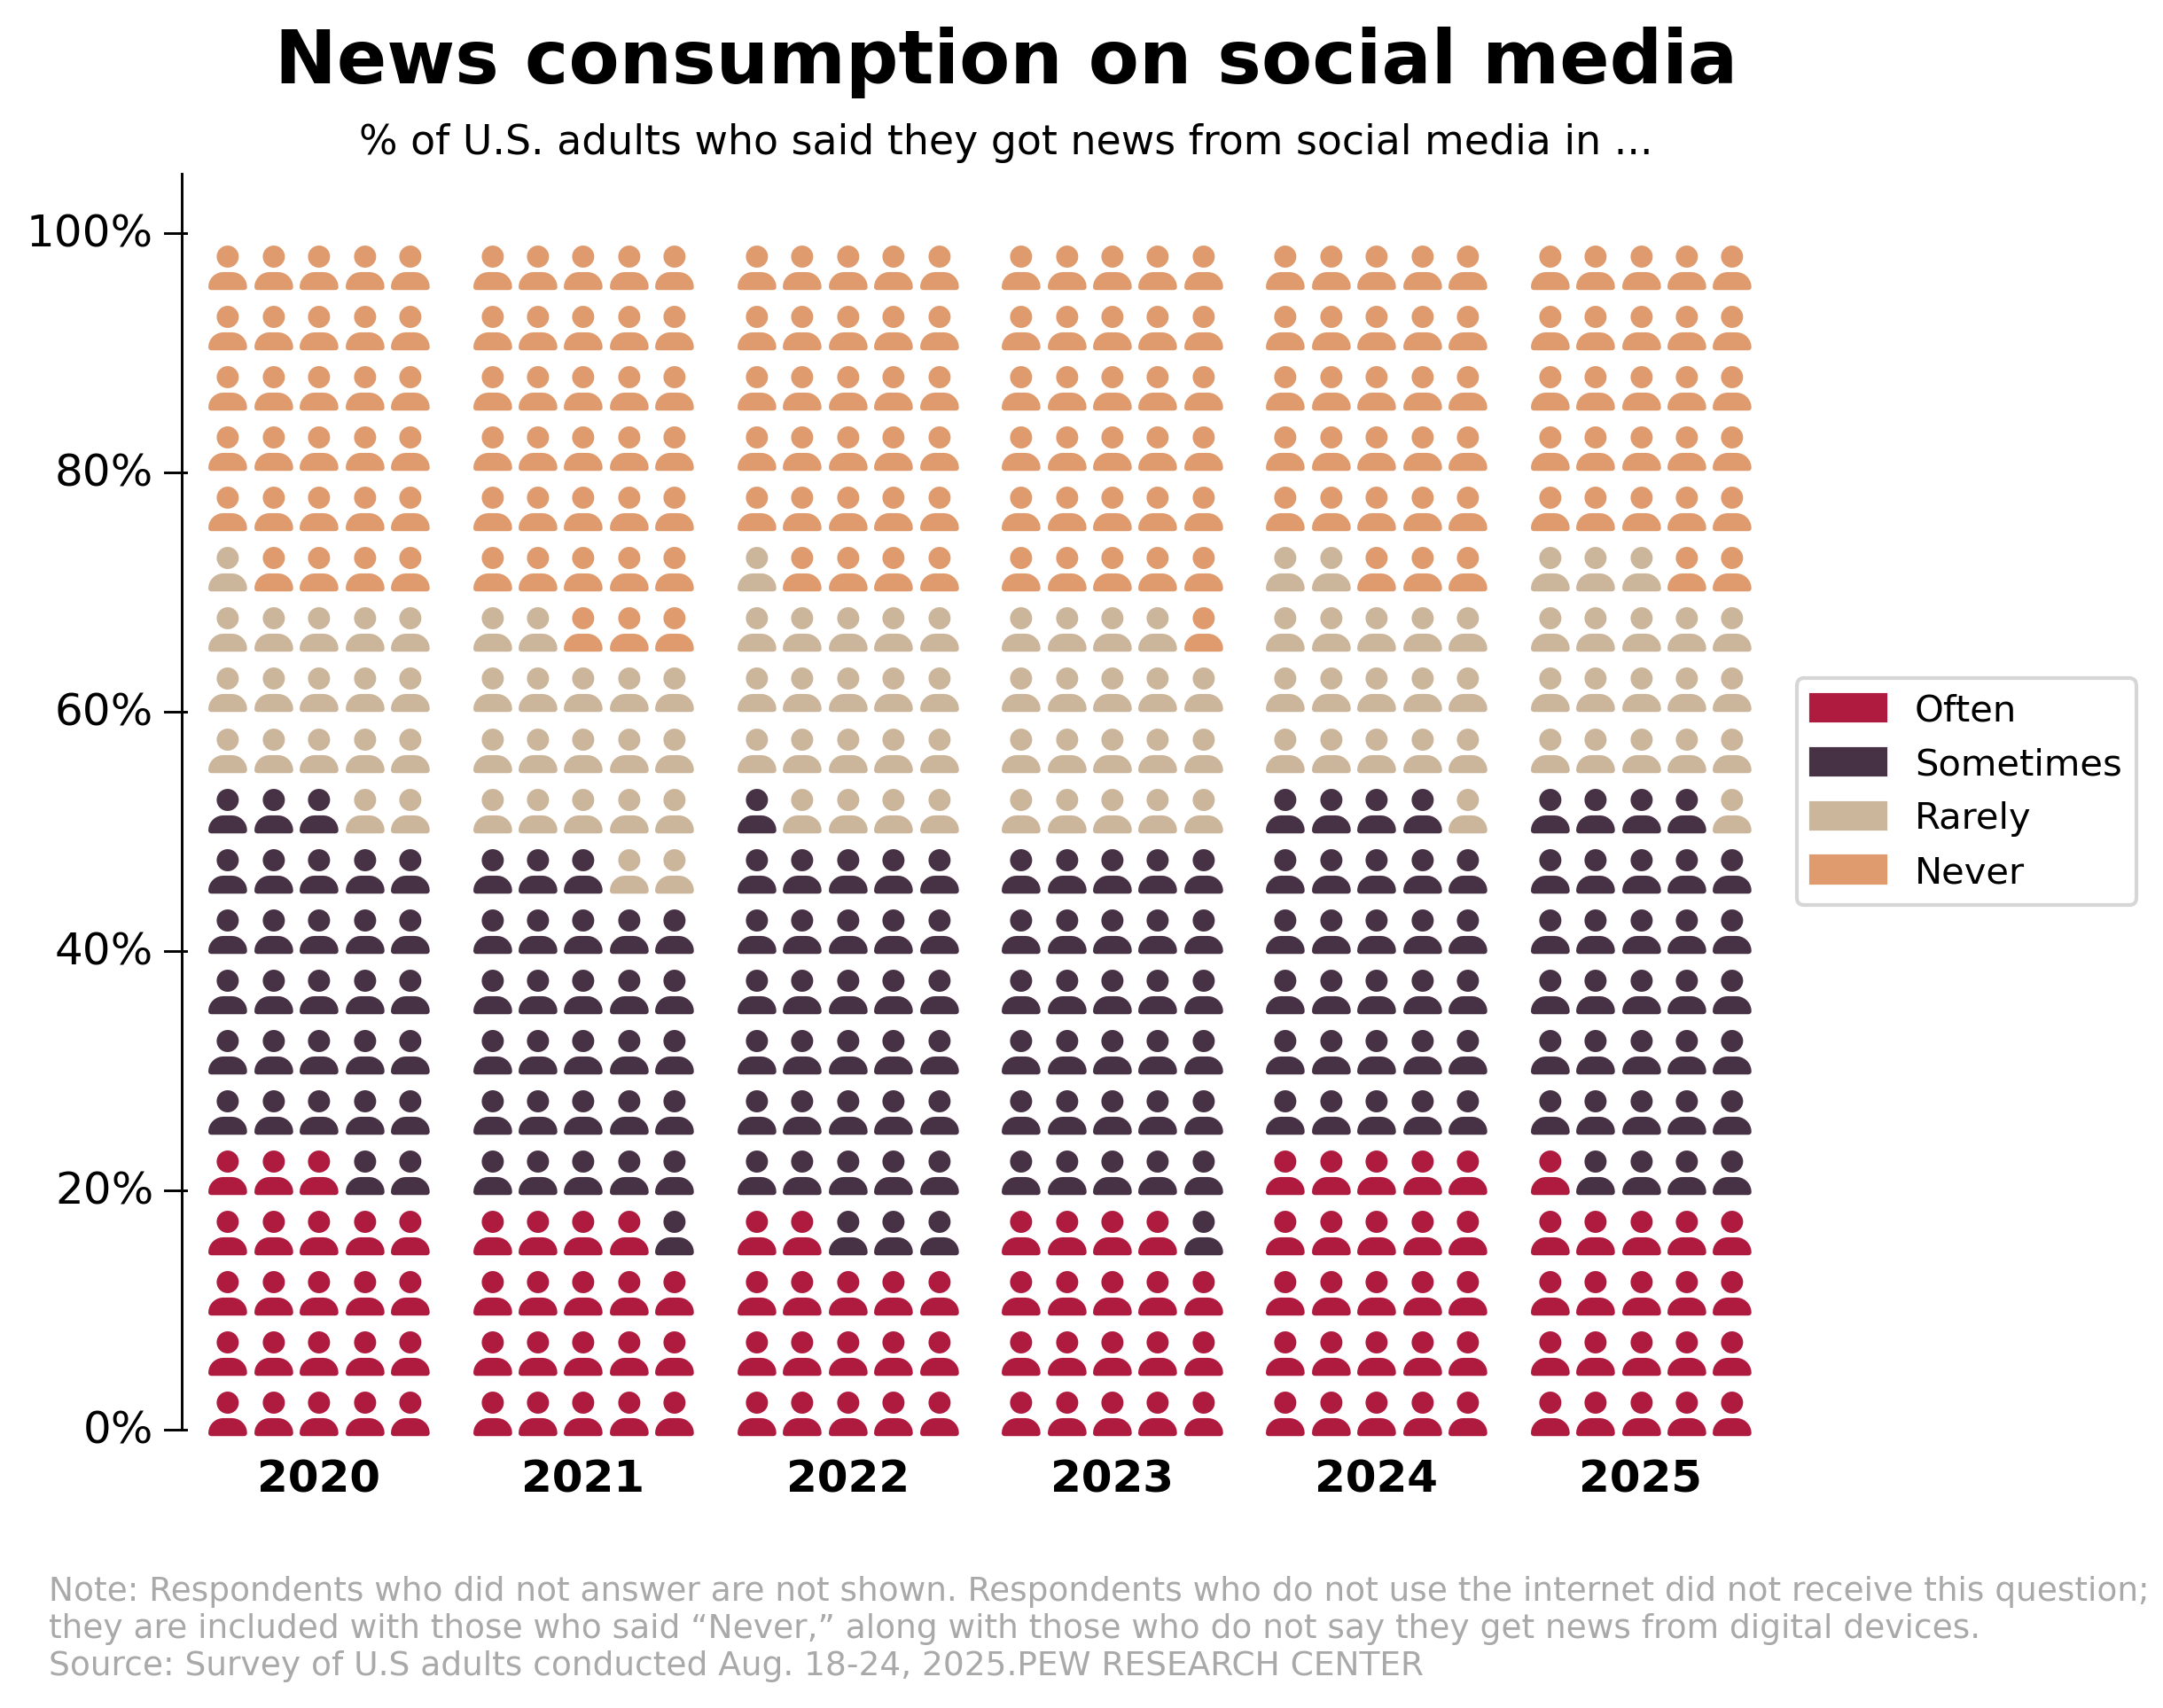

In [87]:
df = news_consumption.copy()
df.set_index('Year', inplace=True)
df = df.T


number_of_bars = len(df.columns)
colors = ["#AF1B3F", "#473144", "#CCB69B", "#DF9B6D"]

fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),dpi = 300)

y_ticks = [0, 20, 40, 60, 80, 100]
for y_tick in y_ticks:
    axs[0].text(
        x=-0.25,
        y=y_tick / 100,
        s=f"{y_tick}%",
        size=12,
        va="center",
        ha="right",
        transform=axs[0].transAxes,
    )
    axs[0].axhline(
        y=y_tick / 100,
        xmin=-0.2,
        xmax=-0.1,
        clip_on=False,
        color="black",
        linewidth=0.7,
    )
axs[0].axvline(x=-0.03, ymax=1.05, clip_on=False, color="black", linewidth=0.7)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        title={"label": col_name, "loc": "center"},
        colors=colors,
        vertical=True,
        #icons=['user-plus', 'user', 'user-minus', 'user-xmark'],
        icons=['user', 'user', 'user', 'user'],
        font_size=12,
        icon_legend=True,
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    )
    ax.set_title(col_name, y=-0.07, fontsize=12, fontweight='bold')

fig.suptitle('News consumption on social media', fontsize=20, fontweight='bold')

# Add a centered subtitle under the main title
fig.text(0.5, 0.9,
            f'% of U.S. adults who said they got news from social media in ...',
            ha='center', fontsize=11, color='black')

# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
fig.legend(handles=legend_elements,
           loc="center right",
           #title="Frequency",
           bbox_to_anchor=(1.04, 0.5))

fig.text(0.05, -0.05, 
         "Note: Respondents who did not answer are not shown. Respondents who do not use the internet did not receive this question; " \
         "they are included with those who said “Never,” along with those who do not say they get news from digital devices.\n" \
         "Source: Survey of U.S adults conducted Aug. 18-24, 2025.PEW RESEARCH CENTER",
         ha='left', fontsize=9, color='darkgray', wrap=True)

plt.subplots_adjust(right=0.85, bottom=0.1, top=0.85)

plt.show()

Digital sources have become an important part of [Americans’ news diets](https://www.pewresearch.org/journalism/fact-sheet/news-platform-fact-sheet/) – with social media playing a crucial role, particularly for younger adults. 

Overall, about half of U.S. adults (53%) say they at least sometimes get news from social media, roughly stable over the last few years.

## **News consumption by social media site** (Grouped Bar Chart)
- % of U.S. adults who say they regularly get news on each social media site
- Dataset: `adults_per_app.csv`

In [88]:
df = df = adults_per_app.copy()
df.set_index('Year', inplace=True)
df

df_long = df.reset_index().melt(
    id_vars='Year',                 # Column to keep as the identifier
    var_name='Platform',            # Name for the new column of platform names
    value_name='Percentage'         # Name for the new column of percentage values
)
# Clean up the '#' from platform names for a cleaner legend
df_long['Platform'] = df_long['Platform'].str.replace('# ', '')

fig = px.bar(
    df_long,
    x='Year',
    y='Percentage',
    color='Platform',              # Group and color bars by the 'Platform' column
    barmode='group',               # This is the key argument for grouping
    labels={'# Year': 'Year', 'Percentage': 'Percentage of Users (%)'}
)

fig.update_layout(
    title=dict(
        text="<b>News Consumption by Social Media Site</b>", # Use HTML <b> tag for bold
        font=dict(
            #family="Helvetica", 
            size=20,        
            color="black"
        ),
        x=0.05 
    ),
    xaxis_title="Year",
    yaxis_title="Percentage of Users (%)"
)

fig.add_annotation(
    text=f"% of U.S. adults who say they regularly get news on each social media site",
    xref="paper", yref="paper", # Use 'paper' coordinates for positioning relative to the figure
    x=0.005, y=1.08,             
    yanchor='top',
    showarrow=False,           
    font=dict(
        #family='Helvetica',
        size=14,
        color="grey"
    )
)


fig.add_annotation(
    # Use HTML <br> for line breaks
    text="Note: Respondents who did not answer are not shown. Respondents who do not use the internet did not receive this question; " \
    "they are included with those who said “Never,” along with those who do not say they get news from digital devices." \
    "<br>Source: Survey of U.S. adults conducted Aug. 18-24, 2025. PEW RESEARCH CENTER",
    xref="paper", yref="paper", # Use 'paper' coordinates
    x=0, y=-0.25,               
    xanchor='left',             
    showarrow=False,
    font=dict(
        size=12,
        color="grey"
    )
)

fig.show()

Facebook and YouTube outpace all other social media sites as places where Americans regularly get news: 38% of U.S. adults say they regularly get news on Facebook, and 35% say the same about YouTube.

Smaller shares of Americans regularly get news on Instagram (20%), TikTok (20%) or X, formerly known as Twitter (12%).

## **Social media sites by portion of users who regularly get news there: Trend from 2020 to 2025** (Candlesticks)
-  % of each social media site’s users who say they regularly get news there
- Dataset: `news_per_app.csv`

In [89]:
df = news_per_app.copy()
df.set_index('Year', inplace=True)

# keep all columns up to and including 'Reddit'
if 'Reddit' in df.columns:
    idx = df.columns.get_loc('Reddit')
    df = df.iloc[:, :idx+1]
df

# We need to calculate the Open, High, Low, and Close for each platform.
ohlc_data = {
    'Open': df.loc[2020],         # Value from the first year
    'Close': df.loc[2025],        # Value from the last year
    'High': df.max(),             # The highest percentage over the period
    'Low': df.min()               # The lowest percentage over the period
}

# Create a new DataFrame with this aggregated data.
df_ohlc = pd.DataFrame(ohlc_data)

# Clean up the platform names for a better-looking chart.
df_ohlc.index = df_ohlc.index.str.replace('# ', '')

fig = go.Figure()

# Add the candlestick trace to the figure.
fig.add_trace(go.Candlestick(
    x=df_ohlc.index,        # The social media platforms
    open=df_ohlc['Open'],
    high=df_ohlc['High'],
    low=df_ohlc['Low'],
    close=df_ohlc['Close']
))

fig.update_layout(
    title= dict(
        text="<b>Social media sites by portion of users who regularly get news there: Trend from 2020 to 2025</b>", # Use HTML <b> tag for bold
        font=dict(
            #family="Helvetica", 
            size=20,        
            color="black" 
        ),
        x=0.5 # Center the title
    ),
    xaxis_title='Social Media Platform',
    yaxis_title='Percentage of Users Getting News (%)',
    template='plotly_white',
    xaxis_rangeslider_visible=False,
)

fig.add_annotation(
    text=f"% of each social media site’s users who say they regularly get news there",
    xref="paper", yref="paper",
    x=0.5, y=1.15,            
    yanchor='top',
    showarrow=False,         
    font=dict(
        #family='Helvetica',
        size=14,
        color="grey"
    )
)

fig.add_annotation(
    # Use HTML <br> for line breaks
    text = "Note: Only respondents who indicated that they use each site were asked if they regularly get news on it. " \
    "Social media sites are shown left to right in descending order by the share of U.S. adults who regularly get news there." \
    "<br>Source: Survey of U.S. adults conducted Aug. 18-24, 2025. PEW RESEARCH CENTER",
    xref="paper", yref="paper", 
    x=0.1, y=-0.30,               
    xanchor='left',             
    showarrow=False,
    font=dict(
        size=12,
        color="grey"
    )
)

fig.show()


Some social media sites – despite having relatively small overall audiences – stand out as destinations for news among many of their users. For example, 57% of X users get news there, as do a similar share of users (55%) on Truth Social, the site owned by President Donald Trump’s media and technology company. On the other hand, only 15% of WhatsApp users regularly get news on that platform.

Just over half of TikTok users (55%) say they regularly get news on the site, up from 22% in 2020. The shares of users who get news on some other sites, such as YouTube and Instagram, also have risen.

## **Who consumes news on each social media site?**

The people who regularly get news on different social media sites often differ by gender, age and other factors. For example, women are more likely to regularly get news from Facebook, Instagram and TikTok, while men are more likely to say they get it from YouTube, X and Reddit. Other patterns are unique to individual sites.

Younger people are more likely to be regular news consumers on TikTok, Instagram, Reddit and X. Black, Hispanic and Asian Americans are more likely than White Americans to regularly get news from YouTube and Instagram. In addition, those without a college degree are more likely than those with a college degree to get news from Facebook and TikTok.

Democrats are also more likely than Republicans to say they get news from Instagram, TikTok and Reddit. Roughly equal shares of each party, though, say they regularly get news from YouTube.

(Read the [Appendix](https://www.pewresearch.org/journalism/2025/09/25/appendix-demographic-profiles-of-regular-social-media-news-consumers-in-the-united-states/) for data on the demographic profiles and party identification of regular social media news consumers in the United States.)

## **Race/Social media platform** (Horizontal grouped bar chart)
-  Demographics and party identification of regular social media news consumers in the U.S. (% of U.S. adults who say they regularly get news from each social media site)
- Dataset: `demographics.csv`

In [90]:
df = demographics.copy()
df.set_index('Demographics', inplace=True)
df

# Filter for the races you want to plot
races_to_plot = ['White', 'Black', 'Hispanic', 'Asian']
df_race = df.loc[races_to_plot].copy()

df_long = df_race.reset_index().melt(
    id_vars='Demographics',
    var_name='Platform',
    value_name='Percentage'
)
df_long['Platform'] = df_long['Platform'].str.replace('# ', '')


fig = px.bar(
    df_long,
    y='Platform',         # Categories on the y-axis
    x='Percentage',       # Values on the x-axis
    color='Demographics', # Group and color by race
    barmode='group',      # This is the key argument for grouping
    orientation='h',      # This makes the chart horizontal
    
    labels={'Platform': 'Social Media Platform', 'Percentage': 'Percentage of Regular Consumers (%)'},
    template='plotly_white'
)

fig.update_layout(
    title=dict(
        text="<b>Social Media News Consumption by Race</b>", # Use HTML <b> tag for bold
        font=dict(
            #family="Helvetica",
            size=20,       
            color="black"  
        ),
        x=0.05 # Center the title
    ),
    xaxis_title="Year",
    yaxis_title="Percentage of Users (%)"
)

# --- 2. Add a Subtitle using an Annotation ---
fig.add_annotation(
    text=f"% of U.S. adults who say they regularly get news from each social media site",
    xref="paper", yref="paper",
    x=-0.008, y=1.08,       
    yanchor='top',
    showarrow=False, 
    font=dict(
        #family='Helvetica',
        size=14,
        color="grey"
    )
)

fig.add_annotation(
    # Use HTML <br> for line breaks
    text = "Note: Only respondents who indicated that they use each site were asked if they regularly get news on it. " \
    "Estimates for Asian adults are representative of English speakers only. " \
    "<br>Source: Survey of U.S. adults conducted Aug. 18-24, 2025. PEW RESEARCH CENTER",
    xref="paper", yref="paper", 
    x=0.15, y=-0.25,    
    xanchor='left',       
    showarrow=False,
    font=dict(
        size=12,
        color="grey"
    )
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

## **Demographics/Social media platform** (Spider chart)
- Demographics and party identification of regular social media news consumers in the U.S. (% of U.S. adults who say they regularly get news from each social media site)
- Dataset: `demographics.csv`

In [91]:
df = demographics.copy()
df.set_index('Demographics', inplace=True)
df

subplot_groups = [
    ("By Gender", ['Men', 'Women']),
    ("By Age Group", ['18-29', '30-49', '50-64', '65+']),
    ("By Political Affiliation", ['Rep/Lean Rep', 'Dem/Lean Dem']),
    ("By Education", ['HS or less', 'Some college', 'College+'])
]

platforms = [col.replace('# ', '') for col in df.columns]

fig = make_subplots(
    rows=2,
    cols=2,
    specs=[[{'type': 'polar'}, {'type': 'polar'}],
           [{'type': 'polar'}, {'type': 'polar'}]],
    horizontal_spacing=0.3,
    vertical_spacing=0
)

for i, (title, demographics_list) in enumerate(subplot_groups):
    # Calculate the row and column for the current subplot
    current_row = (i // 2) + 1 # Integer division gives 0 for i=0,1 and 1 for i=2,3
    current_col = (i % 2) + 1  # Modulo gives 0 for even i and 1 for odd i
    
    # Filter the data for the current group
    df_group = df.loc[demographics_list]

    # Add a trace for each demographic within the group
    for demo in demographics_list:
        fig.add_trace(
            go.Scatterpolar(
                r=df_group.loc[demo].values,
                theta=platforms,
                fill='toself',
                name=demo
            ),
            row=current_row, col=current_col # Place the trace in the calculated cell
        )

fig.update_layout(
    title=dict(
        text="<b>Social Media News Consumption in the U.S. by ...</b>", # Use HTML <b> tag for bold
        font=dict(
            #family="Helvetica", 
            size=20,       
        ),
        x=0.5 # Center the title
    ),

    legend=dict(
        x=1.10,           
        y=0.55,            
        xanchor='left',  
        yanchor='middle'  
    ),

    height=1000,
    width=1000,
    showlegend=True,
    template='plotly_white',

)

fig.add_annotation(
    text=f"% of U.S. adults who say they regularly get news from each social media site grouped by ...",
    xref="paper", yref="paper",
    x=0.57, y=1.05,
    showarrow=False,
    font=dict(
        size=14,
        color="grey"
    )
)

fig.add_annotation(
    # Use HTML <br> for line breaks
    text = "Note: Only respondents who indicated that they use each site were asked if they regularly get news on it. " \
    "<br>Source: Survey of U.S. adults conducted Aug. 18-24, 2025. PEW RESEARCH CENTER",
    xref="paper", yref="paper",
    x=0.15, y=-0.05,             
    xanchor='left',            
    showarrow=False,
    font=dict(
        size=12,
        color="grey"
    )
)

# Add titles to each subplot using annotations
fig.add_annotation(text="<b>Gender<b>", font = dict(size = 15, ), x=0.13, y=1, showarrow=False)
fig.add_annotation(text="<b>Age Group<b>", font = dict(size = 15,),x=0.9, y=1, showarrow=False)
fig.add_annotation(text="<b>Political Affiliation<b>",font = dict(size = 15, ), x=0.09, y=0.48, showarrow=False)
fig.add_annotation(text="<b>Education<b>", font = dict(size = 15,),x=0.9, y=0.48, showarrow=False)

fig.show()